In [1]:
# First we do a set of imports
import csv
from pprint import pprint
import cinnabar
from cinnabar import plotting as cinnabar_plotting
from cinnabar import femap, stats

In [4]:
# temporarily loaded for the creation of a TSV file, although it is not used
# read in the experimental data

experimental_data = {}
experimental_filename = '../../RBFE_validation/NES/H_pocket/star_map/experimental_core1.tsv'

with open(experimental_filename, 'r') as fd:
    rd = csv.reader(fd, delimiter="\t", quotechar='"')
    headers = next(rd)
    for row in rd:
        experimental_data[row[0]] = {}
        experimental_data[row[0]]['dG'] = float(row[1])
        experimental_data[row[0]]['ddG'] = float(row[2])

pprint(experimental_data)

{'lig_1': {'dG': -8.56, 'ddG': 0.0},
 'lig_2': {'dG': -9.08, 'ddG': 0.0},
 'lig_3': {'dG': -9.85, 'ddG': 0.0},
 'lig_4': {'dG': -9.39, 'ddG': 0.0},
 'lig_5': {'dG': -10.91, 'ddG': 0.0},
 'lig_6': {'dG': -9.64, 'ddG': 0.0},
 'lig_7': {'dG': -10.37, 'ddG': 0.0},
 'lig_8': {'dG': -9.35, 'ddG': 0.0},
 'lig_9': {'dG': -10.17, 'ddG': 0.0}}


In [5]:
# Read in calculated results

calculated_data = {}
calculated_filename = './final_results_core4_R1_star.tsv'

with open(calculated_filename, 'r') as fd:
    rd = csv.reader(fd, delimiter="\t", quotechar='"')
    headers = next(rd)
    for row in rd:
        tag = row[0] + "->" + row[1]
        calculated_data[tag] = {}
        calculated_data[tag]['ligand_i'] = row[0]
        calculated_data[tag]['ligand_j'] = row[1]
        calculated_data[tag]['dG'] = float(row[2])
        calculated_data[tag]['ddG'] = float(row[3])

pprint(calculated_data)

{'lig_4-99->lig_1-1': {'dG': -2.02,
                       'ddG': 0.01,
                       'ligand_i': 'lig_4-99',
                       'ligand_j': 'lig_1-1'},
 'lig_4-99->lig_10046-1': {'dG': -4.5,
                           'ddG': 0.01,
                           'ligand_i': 'lig_4-99',
                           'ligand_j': 'lig_10046-1'},
 'lig_4-99->lig_10084-1': {'dG': -3.9300000000000033,
                           'ddG': 0.01,
                           'ligand_i': 'lig_4-99',
                           'ligand_j': 'lig_10084-1'},
 'lig_4-99->lig_10092-6': {'dG': -0.370000000000001,
                           'ddG': 0.01,
                           'ligand_i': 'lig_4-99',
                           'ligand_j': 'lig_10092-6'},
 'lig_4-99->lig_10092-8': {'dG': 0.6699999999999999,
                           'ddG': 0.01,
                           'ligand_i': 'lig_4-99',
                           'ligand_j': 'lig_10092-8'},
 'lig_4-99->lig_10106-2': {'dG': -2.350000000000000

In [6]:
cinnabar_filename = './final_results_core4_R1_star_cin.tsv'

with open(cinnabar_filename, 'w') as f:
    f.write("# Experimental block\n")
    f.write("# Ligand, expt_DDG, expt_dDDG\n")
    for entry in experimental_data:
        dG = experimental_data[entry]['dG']
        ddG = experimental_data[entry]['ddG']
        f.write(f"{entry},{dG:.2f},{ddG:.2f}\n")
    f.write('\n')
    f.write('# Calculated block\n')
    f.write('# Ligand1,Ligand2,calc_DDG,calc_dDDG(MBAR),calc_dDDG(additional)\n')
    for entry in calculated_data:
        dG = calculated_data[entry]['dG']
        ddG = calculated_data[entry]['ddG']
        molA = calculated_data[entry]['ligand_i']
        molB = calculated_data[entry]['ligand_j']
        f.write(f"{molA},{molB},{dG:.2f},0,{ddG:.2f}\n")

/home/hiroyuki/miniforge3/envs/openfe_env/lib/python3.12/site-packages/cinnabar/femap.py:35: UserWarning: Assuming kcal/mol units on measurements
  warnings.warn("Assuming kcal/mol units on measurements")


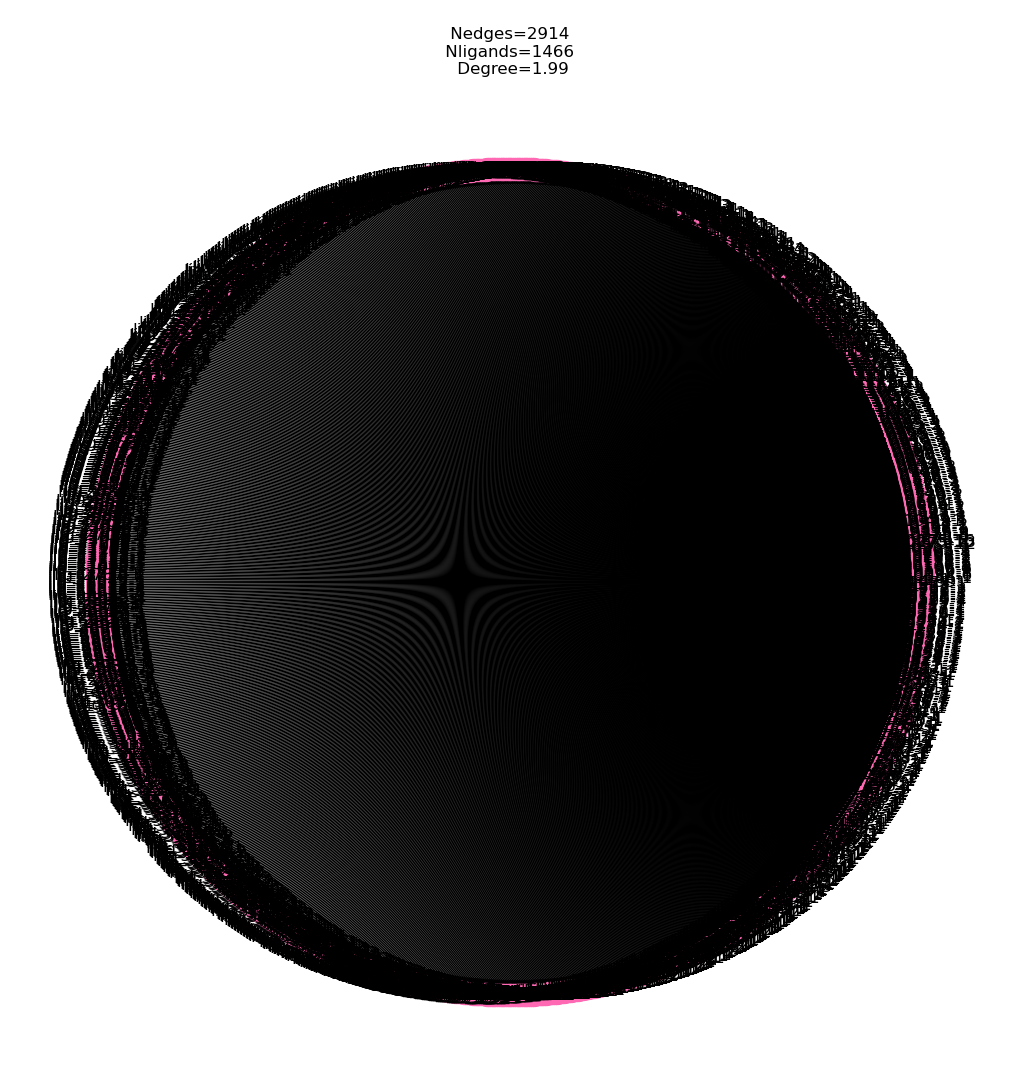

In [7]:
fe = femap.FEMap.from_csv('./final_results_core4_R1_star_cin.tsv')
fe.generate_absolute_values()  # Get MLE generated estimates of the absolute values
fe.draw_graph()
fe.generate_absolute_values()

In [11]:
dG_results = {}
nodes = list(fe.to_legacy_graph().nodes.data())
print(nodes)


for key in range(len(nodes)):
    dG_results[nodes[key][0]] = {
        #'experimental_estimate': nodes[key][1]['exp_DG'],
        #'experimental_error': nodes[key][1]['exp_dDG'],
        'calculated_estimate': round(nodes[key][1]['calc_DG'],2),
        'calculated_error': round(nodes[key][1]['calc_dDG'],2),
    }

# write out the calculated results
# set the DE(MLE) of "lig_4-99" as the reference to 0
with open('./cinnabar_output_core4_star.dat', 'w') as f:
    writer = csv.writer(f, delimiter="\t", lineterminator="\n")
    writer.writerow(["ligand", "DG(MLE)", "uncertainty (kcal/mol)",])
    for ligand in dG_results:
        writer.writerow([
            ligand,
            dG_results[ligand]['calculated_estimate']-1.87,
            dG_results[ligand]['calculated_error'],
        ])
        print(dG_results[ligand])

[('lig_4-99', {'calc_DG': 1.8707343857240906, 'calc_dDG': 0.00026189133875551007}), ('lig_1-1', {'calc_DG': -0.1492656142765113, 'calc_dDG': 0.009996565345841164}), ('lig_10046-1', {'calc_DG': -2.6292656142756026, 'calc_dDG': 0.009996565345840924}), ('lig_10084-1', {'calc_DG': -2.0592656142764385, 'calc_dDG': 0.009996565345841039}), ('lig_10092-6', {'calc_DG': 1.5007343857239077, 'calc_dDG': 0.009996565345841348}), ('lig_10092-8', {'calc_DG': 2.540734385724109, 'calc_dDG': 0.009996565345841412}), ('lig_10106-2', {'calc_DG': -0.47926561427506026, 'calc_dDG': 0.009996565345841535}), ('lig_10106-3', {'calc_DG': 2.290734385723615, 'calc_dDG': 0.009996565345840942}), ('lig_10106-8', {'calc_DG': -3.6692656142758944, 'calc_dDG': 0.009996565345840739}), ('lig_10117-1', {'calc_DG': -3.879265614276202, 'calc_dDG': 0.009996565345841167}), ('lig_10134-1', {'calc_DG': 0.6607343857244009, 'calc_dDG': 0.009996565345841419}), ('lig_10134-2', {'calc_DG': 1.080734385724605, 'calc_dDG': 0.009996565345841

In [12]:
import pandas as pd

# タブ区切りのファイルを読み込む
df = pd.read_csv('./cinnabar_output_core4_star.dat', delimiter='\t')

# 'ligand'カラムから'lig_'を取り除いた新しいカラム'ligand_num'を作成
df['ligand_num'] = df['ligand'].str.replace('lig_', '')

# カンマ区切りのCSVファイルとして保存
df.to_csv('./cinnabar_output_core4_star.csv', index=False)